# First Models

I need some functions for KNN to:

- fast load data

- build distance matrices

- cross-validate alphas

Categorical features:

- conc1_type
- exposure_type
- control_type
- media_type
- application_freq_unit
- class, tax_order, family, genus, species

Non Categorical features:
- obs_duration_mean
- conc1_mean
- atom_number
- alone_atom_number
- bonds_number
- doubleBond
- tripleBond
- ring_number
- Mol
- MorganDensity
- LogP
- oh_count

In [1]:
from helper_knn import *

X_try, X_train, X_test, y_train, y_test, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)

In [2]:
print(X_train.shape)
print(X_test.shape)

(17986, 22)
(8860, 22)


In [7]:
categorical = ['conc1_type', 'exposure_type', 'control_type', 'media_type', 'application_freq_unit',
                    'class', 'tax_order', 'family', 'genus', 'species']

non_categorical = ['obs_duration_mean', 'atom_number', 'alone_atom_number', 'bonds_number', 'doubleBond',
                   'tripleBond', 'ring_number', 'Mol', 'MorganDensity', 'LogP', 'oh_count']

In [11]:
from time import ctime
print(ctime())
dist_matr = hamming_matrix(X_try, categorical)
print(ctime())

Fri Sep  4 19:18:18 2020
Fri Sep  4 19:19:05 2020


In [18]:
print(ctime())
dist_matr += euclidean_matrix(X_try, non_categorical)
print(ctime())

Fri Sep  4 19:24:00 2020
Fri Sep  4 19:57:14 2020


In [19]:
dist_matr_train = dist_matr[:len_X_train,:len_X_train]
dist_matr_test = dist_matr[len_X_train:,:len_X_train]

In [21]:
# Matrice euclidea + hamming entrambi peso 1
neigh = KNeighborsClassifier(metric = 'precomputed', n_neighbors = 1, leaf_size = 70)
neigh.fit(dist_matr_train, y_train.ravel())
y_pred = neigh.predict(dist_matr_test)
print('Model: {}, \n Accuracy: {},\n RMSE: {}'.format(neigh,
                                                      accuracy_score(y_test, y_pred),
                                                      sqrt(mean_squared_error(y_test, y_pred))))

Model: KNeighborsClassifier(algorithm='auto', leaf_size=70, metric='precomputed',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'), 
 Accuracy: 0.841647855530474,
 RMSE: 0.3979348495288217


In [47]:
# Dati normali con ordinal encoding
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train.drop(columns = ['pubchem2d']), y_train.ravel())
y_pred = neigh.predict(X_test.drop(columns = ['pubchem2d']))
print('Model: {}, \n Accuracy: {},\n RMSE: {}'.format(neigh,
                                                      accuracy_score(y_test, y_pred),
                                                      sqrt(mean_squared_error(y_test, y_pred))))

Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 
 Accuracy: 0.7252821670428894,
 RMSE: 0.5241353193185044


# KNN tables (BINARY and MULTICLASS)

## PUBCHEM2D

In [1]:
from helper_knn import *
from time import ctime
X_try, X_train, X_test, y_train, y_test, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)

print(ctime())
dist_matr = pubchem2d_matrix(X_try)
print(ctime())

X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

Sat Sep  5 11:26:11 2020
Sat Sep  5 11:37:57 2020


In [34]:
X_try, X_train, X_test, y_train_bin, y_test_bin, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)
X_try, X_train, X_test, y_train_mul, y_test_mul, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'multiclass', seed = 42)

In [56]:
tab_pub_bin = create_table(X_train_new, X_test_new, y_train_bin, y_test_bin, encoding = 'binary')

1 2 3 4 5 6 7 8 9 10 11 12 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 

In [58]:
tab_pub_bin.to_csv('output/table_knn_pubchem_binary.csv')

In [59]:
tab_pub_mul = create_table(X_train_new, X_test_new, y_train_mul, y_test_mul, encoding = 'multiclass')

1 2 3 4 5 6 7 8 9 10 11 12 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 

In [61]:
tab_pub_mul.to_csv('output/table_knn_pubchem_multiclass.csv')

### DISPLAY

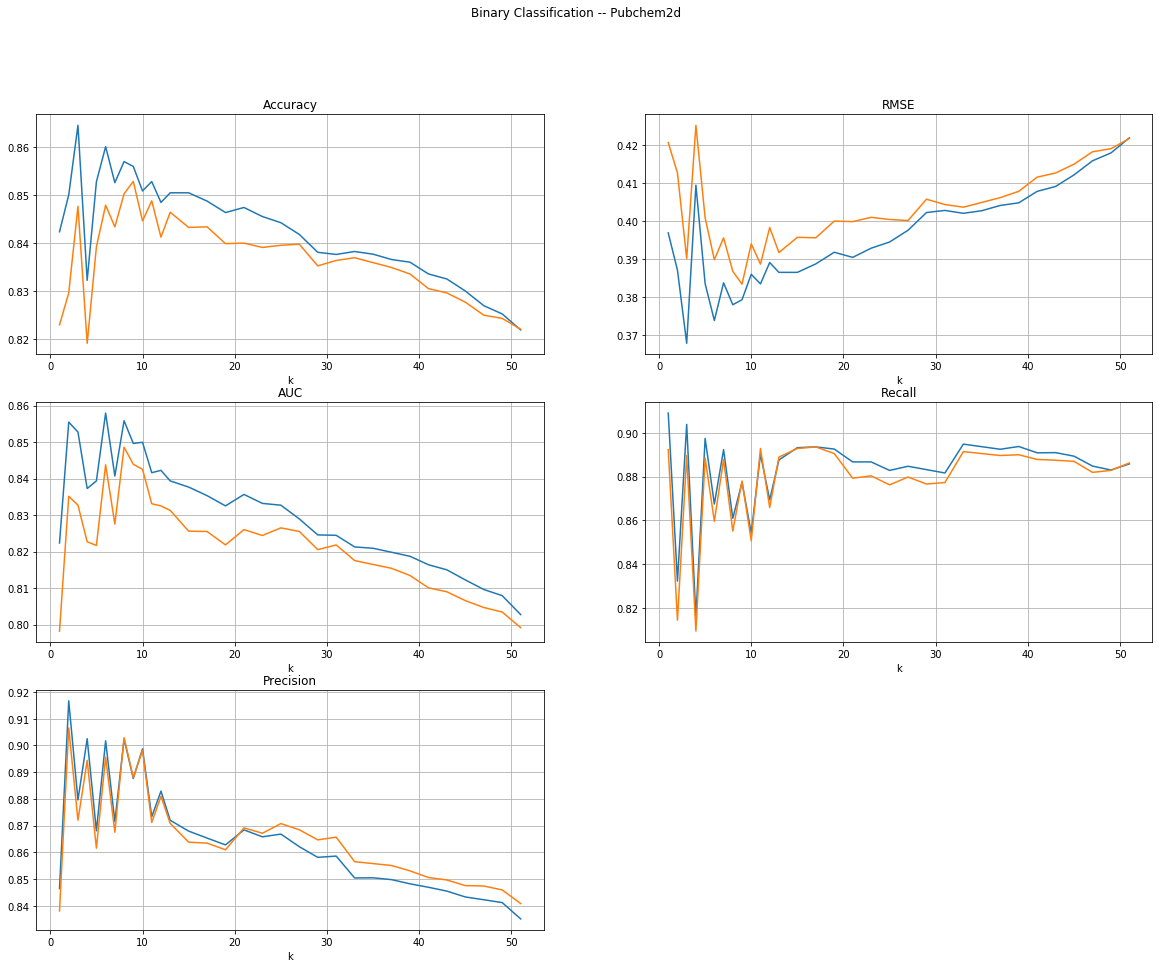

In [65]:
display_table(tab_pub_bin, 'Binary Classification -- Pubchem2d', encoding = 'binary')

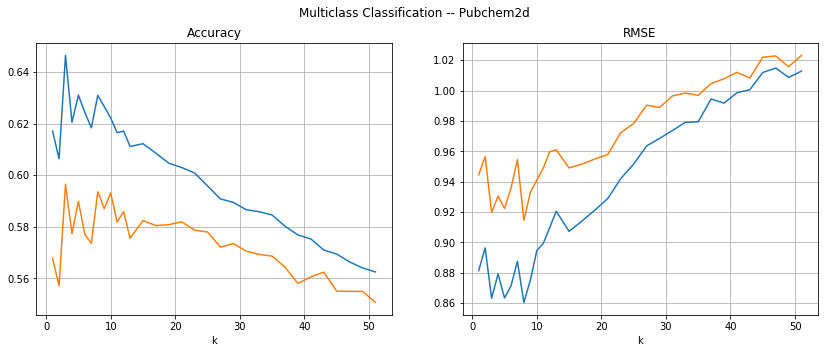

In [67]:
display_table(tab_pub_mul, 'Multiclass Classification -- Pubchem2d', encoding = 'multiclass')

## TANIMOTO

In [1]:
from helper_knn import *
from time import ctime

X_try, X_train, X_test, y_train, y_test, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)

In [3]:
print(ctime())
dist_matr = tanimoto_matrix(X_try)
print(ctime())
X_train_new = dist_matr[:len_X_train,:len_X_train]
X_test_new = dist_matr[len_X_train:,:len_X_train]

del dist_matr

Sat Sep  5 12:57:49 2020
Sat Sep  5 13:07:13 2020


In [4]:
X_try, X_train, X_test, y_train_bin, y_test_bin, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)
X_try, X_train, X_test, y_train_mul, y_test_mul, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'multiclass', seed = 42)

In [5]:
tab_tan_bin = create_table(X_train_new, X_test_new, y_train_bin, y_test_bin, encoding = 'binary')

1 2 3 4 5 6 7 8 9 10 11 12 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 

In [7]:
tab_tan_bin.to_csv('output/table_knn_tanimoto_binary.csv')

In [5]:
tab_tan_mul = create_table(X_train_new, X_test_new, y_train_mul, y_test_mul, encoding = 'multiclass')

1 2 3 4 5 6 7 8 9 10 11 12 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 

In [7]:
tab_tan_mul.to_csv('output/table_knn_tanimoto_multiclass.csv')

### DISPLAY

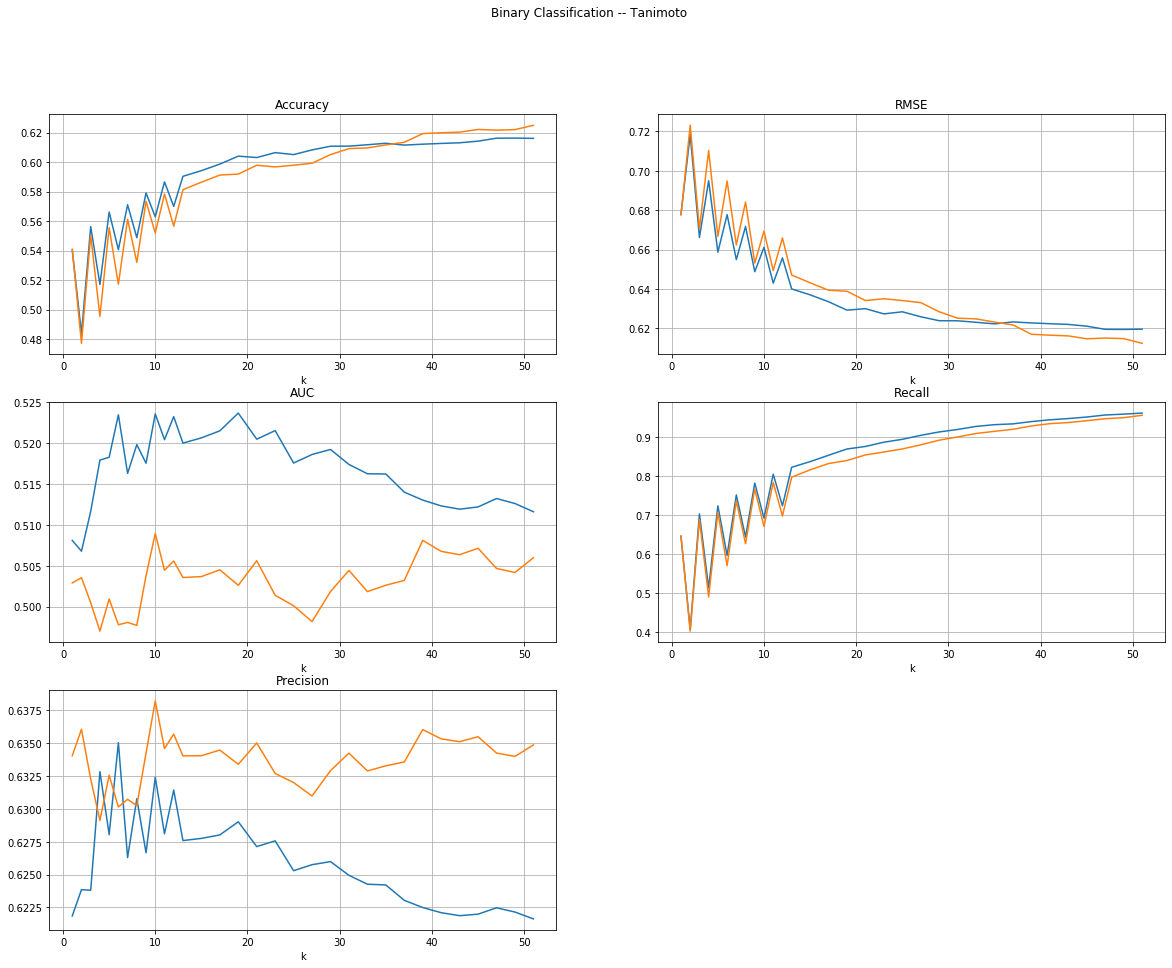

In [11]:
display_table(tab_tan_bin, 'Binary Classification -- Tanimoto', encoding = 'binary')

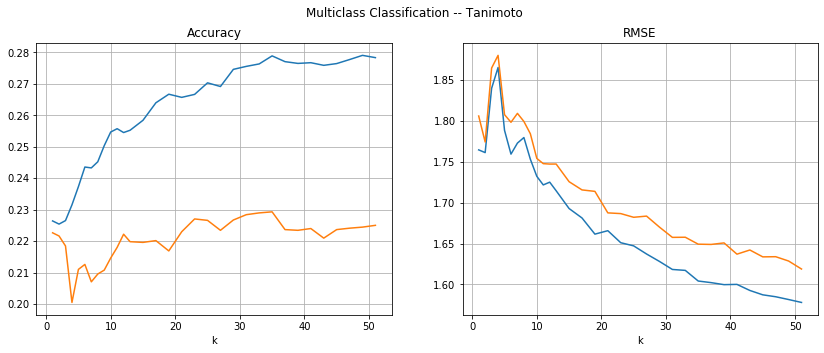

In [12]:
display_table(tab_tan_mul, 'Multiclass Classification -- Tanimoto', encoding = 'multiclass')

## Previous work (binary)

In [3]:
from helper_knn import *
from time import ctime

X_try, X_train, X_test, y_train, y_test, len_X_train = load_data_knn('data/lc_db_processed.csv',
                                                                     encoding = 'binary', seed = 42)

In [4]:
categorical = ['conc1_type', 'exposure_type', 'control_type', 'media_type', 'application_freq_unit',
                    'class', 'tax_order', 'family', 'genus', 'species']

non_categorical = ['obs_duration_mean', 'atom_number', 'alone_atom_number', 'bonds_number', 'doubleBond',
                   'tripleBond', 'ring_number', 'Mol', 'MorganDensity', 'LogP', 'oh_count']

In [5]:
k_try = [1,3,5,7,11,13,15,17,19,23,31,41,51]

c = [0,0]
ham = np.logspace(-3, 0, 20) 
for i in k_try:
    best_acc, best_alpha, best_k, best_leaf = cv_params_new(X_train, y_train, categorical, non_categorical,
                                                    sequence_ham = ham, choice = c, ks = [i])
    print('\n \n Con K = {}, a_ham = {}, best_leaf = {} \n \n'.format(i,best_alpha, best_leaf))

Sat Sep  5 16:19:59 2020
START...
Computing Euclidean ...

 Sat Sep  5 16:20:06 2020
Adding Hamming 1 (Categorical)... alpha = 0.001
Sat Sep  5 16:20:18 2020
Start CV...
New best params found! alpha:0.001, k:1, leaf:10,
                                                        acc:  0.8502169756373161, st.error:  0.0035580953231469743,
                                                        rmse: 0.386908070820739, st.error:  0.004614355221961838
New best params found! alpha:0.001, k:1, leaf:70,
                                                        acc:  0.850772979088404, st.error:  0.001792802213800983,
                                                        rmse: 0.3862708329570096, st.error:  0.0023379755288458226
New best params found! alpha:0.001, k:1, leaf:80,
                                                        acc:  0.8512179796547767, st.error:  0.0030003286929793592,
                                                        rmse: 0.38564412381215984, st.error:  0.0038932670

Sat Sep  5 19:46:39 2020
Start CV...

 Sat Sep  5 19:50:53 2020
Adding Hamming 1 (Categorical)... alpha = 1.0
Sat Sep  5 19:52:51 2020
Start CV...

 
 Con K = 3, a_ham = 0.002976351441631319, best_leaf = 100 
 

Sat Sep  5 19:57:07 2020
START...
Computing Euclidean ...

 Sat Sep  5 19:57:15 2020
Adding Hamming 1 (Categorical)... alpha = 0.001
Sat Sep  5 19:57:27 2020
Start CV...
New best params found! alpha:0.001, k:5, leaf:10,
                                                        acc:  0.8458804299735295, st.error:  0.0036655979399562257,
                                                        rmse: 0.39246623023080424, st.error:  0.004738885810287778

 Sat Sep  5 20:02:03 2020
Adding Hamming 1 (Categorical)... alpha = 0.0014384498882876629
Sat Sep  5 20:04:35 2020
Start CV...
New best params found! alpha:0.0014384498882876629, k:5, leaf:20,
                                                        acc:  0.8473258473222774, st.error:  0.0025584228056136113,
                           

Sun Sep  6 00:33:21 2020
Start CV...

 Sun Sep  6 00:37:10 2020
Adding Hamming 1 (Categorical)... alpha = 0.00206913808111479
Sun Sep  6 00:39:05 2020
Start CV...
New best params found! alpha:0.00206913808111479, k:11, leaf:10,
                                                        acc:  0.8265320074801388, st.error:  0.0024819005896935787,
                                                        rmse: 0.4164524203604131, st.error:  0.002973806307374103
New best params found! alpha:0.00206913808111479, k:11, leaf:30,
                                                        acc:  0.8279211120748979, st.error:  0.0030949048385624585,
                                                        rmse: 0.4147558995129768, st.error:  0.0037560532572013306

 Sun Sep  6 00:43:01 2020
Adding Hamming 1 (Categorical)... alpha = 0.002976351441631319
Sun Sep  6 00:44:34 2020
Start CV...

 Sun Sep  6 00:48:25 2020
Adding Hamming 1 (Categorical)... alpha = 0.004281332398719396
Sun Sep  6 00:49:36 2020
Star


 Sun Sep  6 04:58:52 2020
Adding Hamming 1 (Categorical)... alpha = 0.012742749857031334
Sun Sep  6 04:59:44 2020
Start CV...

 Sun Sep  6 05:03:34 2020
Adding Hamming 1 (Categorical)... alpha = 0.018329807108324356
Sun Sep  6 05:04:39 2020
Start CV...

 Sun Sep  6 05:08:30 2020
Adding Hamming 1 (Categorical)... alpha = 0.026366508987303583
Sun Sep  6 05:09:31 2020
Start CV...

 Sun Sep  6 05:13:22 2020
Adding Hamming 1 (Categorical)... alpha = 0.0379269019073225
Sun Sep  6 05:14:45 2020
Start CV...

 Sun Sep  6 05:18:38 2020
Adding Hamming 1 (Categorical)... alpha = 0.05455594781168517
Sun Sep  6 05:20:48 2020
Start CV...

 Sun Sep  6 05:24:42 2020
Adding Hamming 1 (Categorical)... alpha = 0.07847599703514611
Sun Sep  6 05:26:20 2020
Start CV...

 Sun Sep  6 05:30:12 2020
Adding Hamming 1 (Categorical)... alpha = 0.11288378916846883
Sun Sep  6 05:31:12 2020
Start CV...

 Sun Sep  6 05:35:03 2020
Adding Hamming 1 (Categorical)... alpha = 0.1623776739188721
Sun Sep  6 05:36:56 2020
Sta

Sun Sep  6 09:14:26 2020
Start CV...

 Sun Sep  6 09:18:19 2020
Adding Hamming 1 (Categorical)... alpha = 0.11288378916846883
Sun Sep  6 09:20:00 2020
Start CV...

 Sun Sep  6 09:23:56 2020
Adding Hamming 1 (Categorical)... alpha = 0.1623776739188721
Sun Sep  6 09:25:01 2020
Start CV...

 Sun Sep  6 09:28:54 2020
Adding Hamming 1 (Categorical)... alpha = 0.23357214690901212
Sun Sep  6 09:30:02 2020
Start CV...

 Sun Sep  6 09:33:53 2020
Adding Hamming 1 (Categorical)... alpha = 0.3359818286283781
Sun Sep  6 09:35:14 2020
Start CV...

 Sun Sep  6 09:39:07 2020
Adding Hamming 1 (Categorical)... alpha = 0.4832930238571752
Sun Sep  6 09:43:17 2020
Start CV...

 Sun Sep  6 09:47:17 2020
Adding Hamming 1 (Categorical)... alpha = 0.6951927961775606
Sun Sep  6 09:55:48 2020
Start CV...

 Sun Sep  6 10:00:02 2020
Adding Hamming 1 (Categorical)... alpha = 1.0
Sun Sep  6 10:04:49 2020
Start CV...

 
 Con K = 19, a_ham = 0.012742749857031334, best_leaf = 70 
 

Sun Sep  6 10:08:47 2020
START...
Co


 Sun Sep  6 14:01:43 2020
Adding Hamming 1 (Categorical)... alpha = 0.0014384498882876629
Sun Sep  6 14:02:38 2020
Start CV...

 Sun Sep  6 14:06:29 2020
Adding Hamming 1 (Categorical)... alpha = 0.00206913808111479
Sun Sep  6 14:07:49 2020
Start CV...

 Sun Sep  6 14:11:46 2020
Adding Hamming 1 (Categorical)... alpha = 0.002976351441631319
Sun Sep  6 14:14:15 2020
Start CV...

 Sun Sep  6 14:18:08 2020
Adding Hamming 1 (Categorical)... alpha = 0.004281332398719396
Sun Sep  6 14:19:42 2020
Start CV...

 Sun Sep  6 14:23:39 2020
Adding Hamming 1 (Categorical)... alpha = 0.006158482110660267
Sun Sep  6 14:27:39 2020
Start CV...

 Sun Sep  6 14:31:33 2020
Adding Hamming 1 (Categorical)... alpha = 0.008858667904100823
Sun Sep  6 14:32:57 2020
Start CV...
New best params found! alpha:0.008858667904100823, k:41, leaf:10,
                                                        acc:  0.7825523802106102, st.error:  0.004496425668867245,
                                                        r

Sun Sep  6 17:29:58 2020
Start CV...
New best params found! alpha:0.23357214690901212, k:51, leaf:20,
                                                        acc:  0.7793837060498967, st.error:  0.002597869259219501,
                                                        rmse: 0.4696656327558336, st.error:  0.002760767926035047
New best params found! alpha:0.23357214690901212, k:51, leaf:70,
                                                        acc:  0.779828119381184, st.error:  0.003165617393926573,
                                                        rmse: 0.46917563583481475, st.error:  0.0033949726734250328

 Sun Sep  6 17:33:48 2020
Adding Hamming 1 (Categorical)... alpha = 0.3359818286283781
Sun Sep  6 17:35:00 2020
Start CV...
New best params found! alpha:0.3359818286283781, k:51, leaf:60,
                                                        acc:  0.7802177344068609, st.error:  0.0037418415955051076,
                                                        rmse: 0.46874